In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Code Section

In [ ]:
main_df = pd.read_csv("water_mtech.csv")
df = main_df.copy()

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.155654,243.312279,23609.94686,6.229494,261.139806,502.334620,17.296367,84.035285,3.455268,0
1,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,1
2,7.563408,202.820771,19101.30263,5.262889,257.248763,372.374969,18.380542,79.091578,4.346576,1
3,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,1
4,6.261934,204.419185,13992.02243,7.309705,350.828409,368.859290,14.678454,50.168741,3.962236,1


In [ ]:
print(df.shape)

(8276, 10)


In [ ]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,7248.000000,8276.000000,8276.000000,8276.000000,5522.000000,8276.000000,8276.000000,7964.000000,8276.000000,8276.000000
mean,7.102635,200.444718,21250.410124,7.269065,334.426571,425.366130,14.840917,66.973167,3.835213,0.647656
std,1.420080,29.358547,7972.718466,1.499262,36.943233,71.482743,3.268426,16.134934,0.736233,0.477729
min,0.227499,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.195213,182.557103,15509.343230,6.282365,313.905490,372.853130,12.487161,54.490450,3.325593,0.000000
50%,6.948014,202.166754,19870.169600,7.217011,337.556351,419.286511,14.673056,66.688039,3.877479,1.000000
75%,8.016806,218.447861,26188.481383,8.287286,357.355148,474.723558,17.247941,79.633358,4.343046,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               7248 non-null   float64
 1   Hardness         8276 non-null   float64
 2   Solids           8276 non-null   float64
 3   Chloramines      8276 non-null   float64
 4   Sulfate          5522 non-null   float64
 5   Conductivity     8276 non-null   float64
 6   Organic_carbon   8276 non-null   float64
 7   Trihalomethanes  7964 non-null   float64
 8   Turbidity        8276 non-null   float64
 9   Potability       8276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 646.7 KB


In [ ]:
print(df.nunique())

ph                 7248
Hardness           8275
Solids             8276
Chloramines        8276
Sulfate            5522
Conductivity       8276
Organic_carbon     8276
Trihalomethanes    7964
Turbidity          8276
Potability            2
dtype: int64


<Axes: xlabel='Hardness', ylabel='Count'>

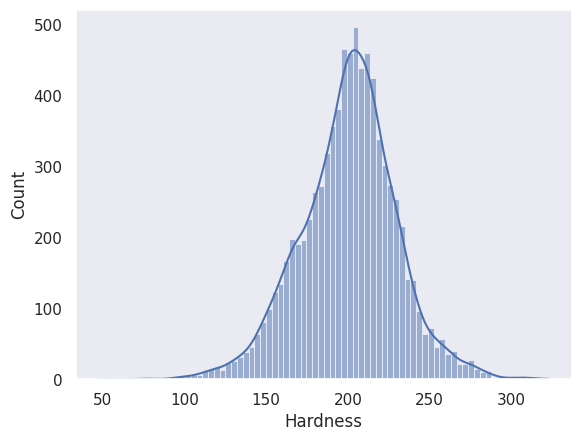

In [ ]:
sns.histplot(data=df,kde =True,x="Hardness")

In [ ]:
print(df.isnull().sum())

ph                 1028
Hardness              0
Solids                0
Chloramines           0
Sulfate            2754
Conductivity          0
Organic_carbon        0
Trihalomethanes     312
Turbidity             0
Potability            0
dtype: int64


<Axes: >

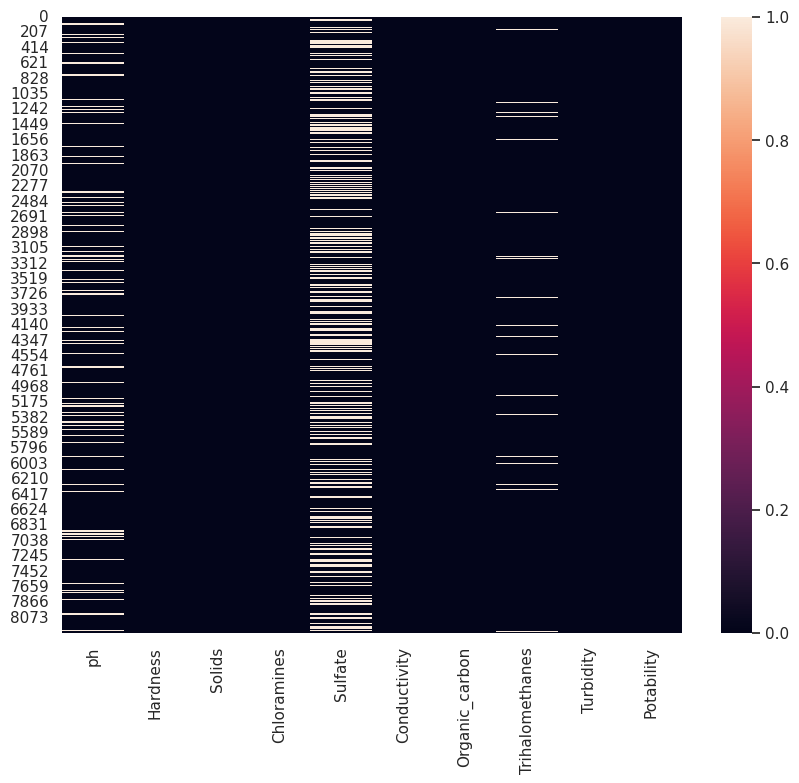

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<Axes: >

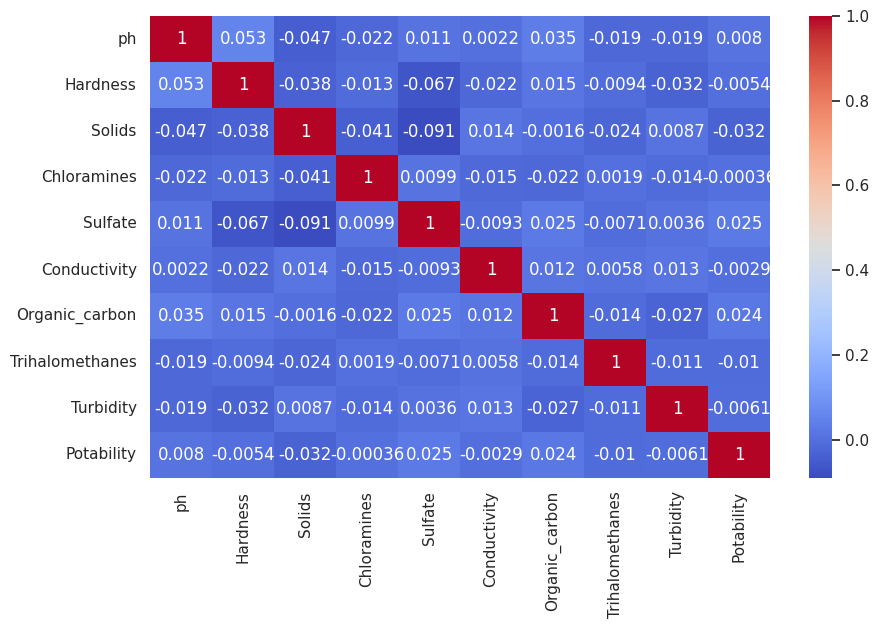

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

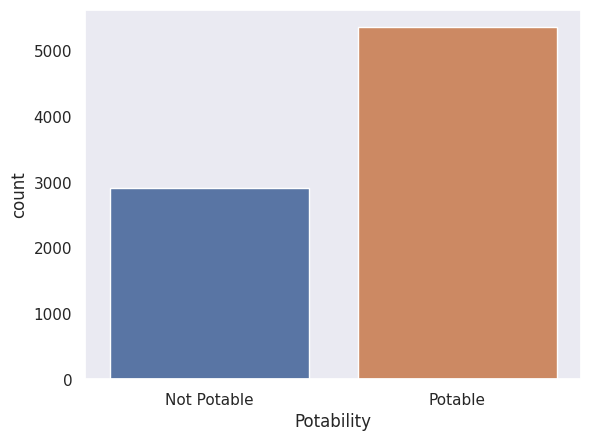

<Figure size 1000x800 with 0 Axes>

In [ ]:
ax = sns.countplot(x = "Potability",data= df)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.figure(figsize=(10, 8))
plt.show()

In [ ]:
x = df.Potability.value_counts()
print(x)

1    5360
0    2916
Name: Potability, dtype: int64


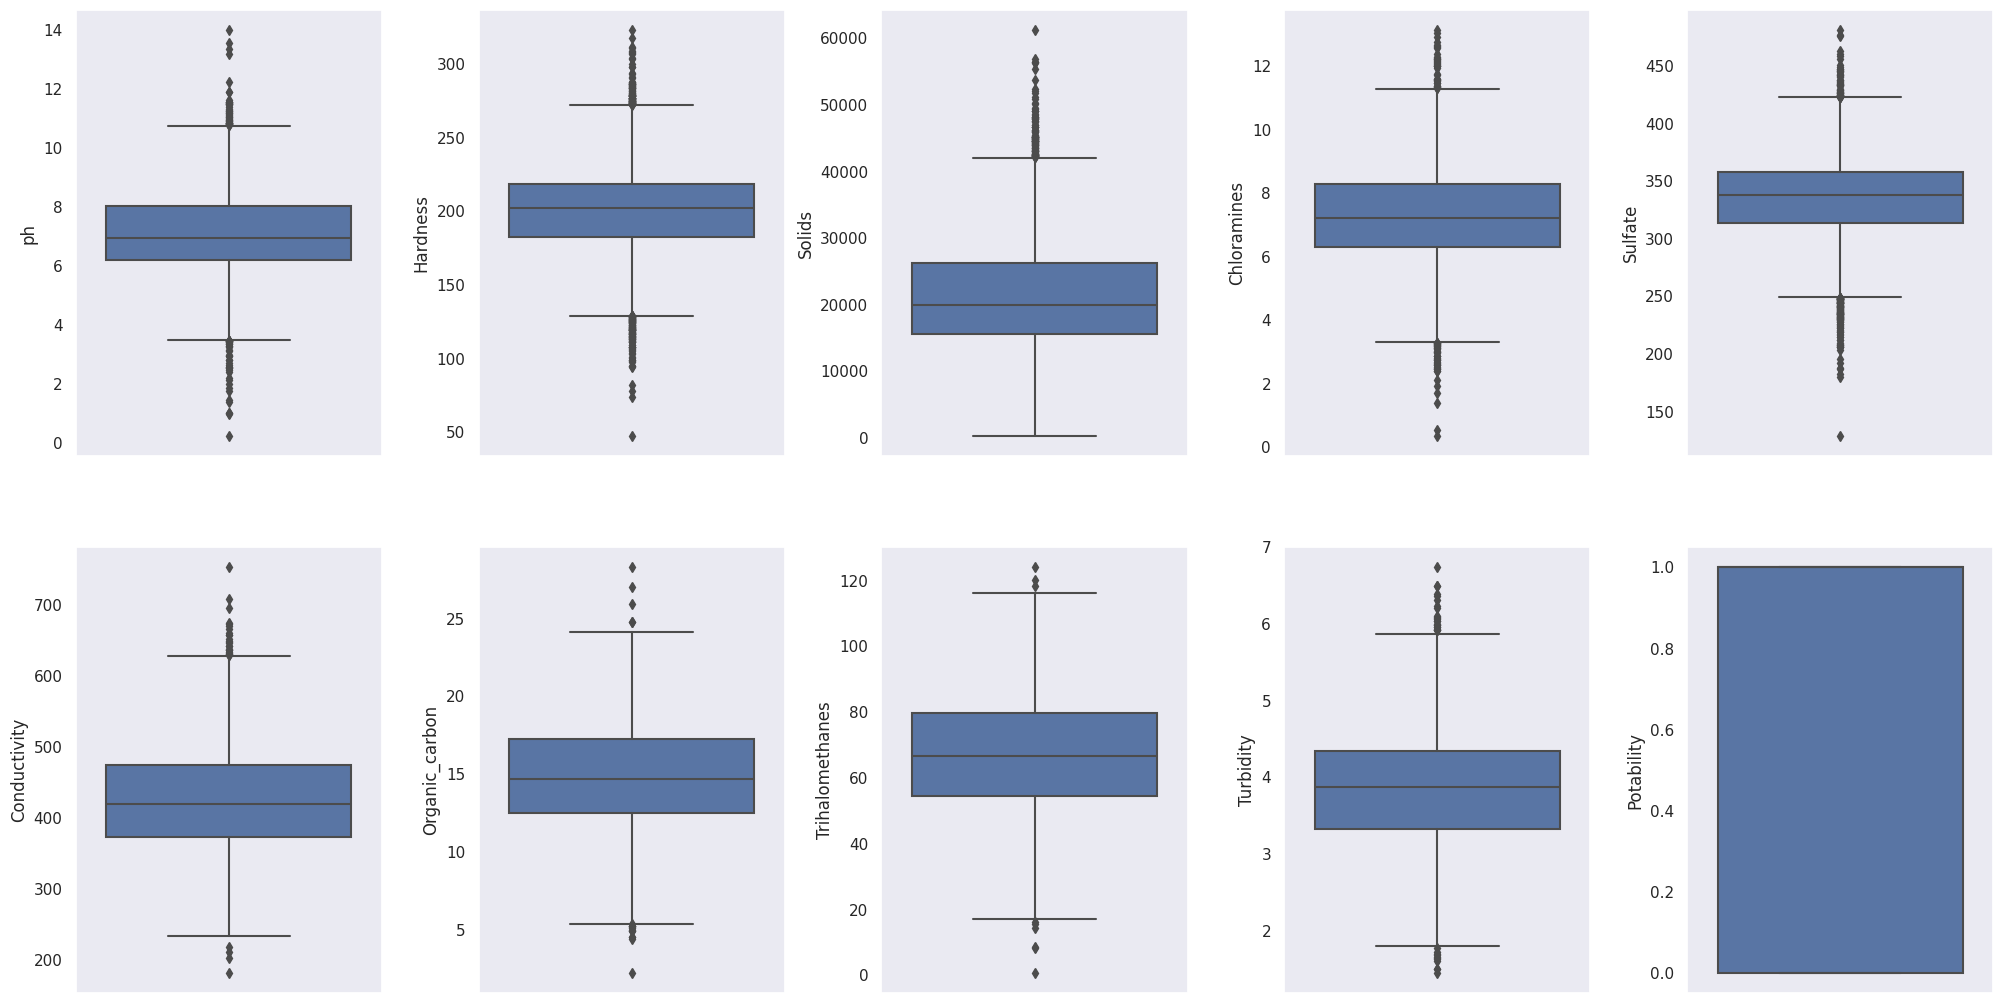

In [ ]:
# Visualizing dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
fig =  px.pie (df, names = "Potability", hole = 0.3, template = "plotly_dark")
fig.show ()

In [ ]:
fig = px.histogram (df, x = "Sulfate", facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

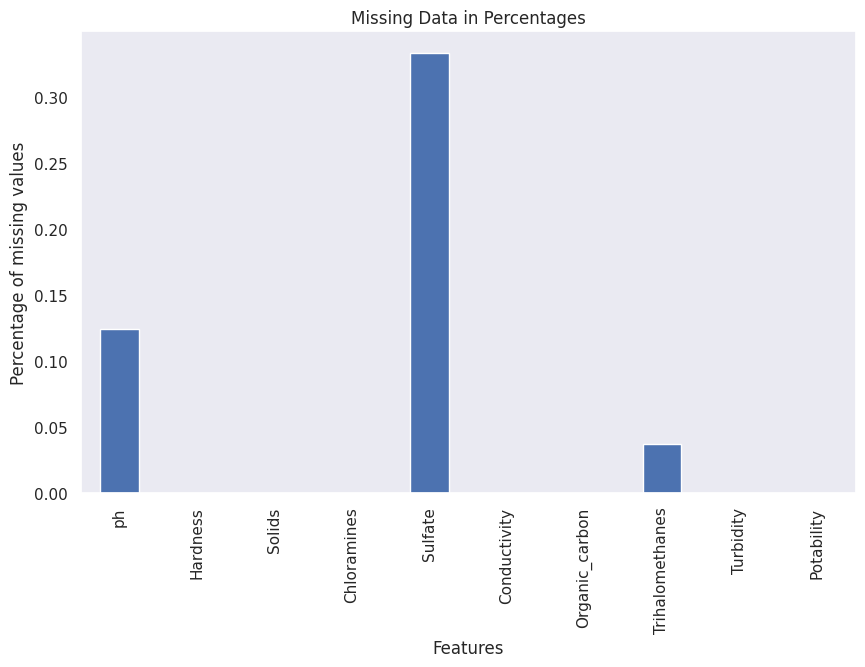

In [ ]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

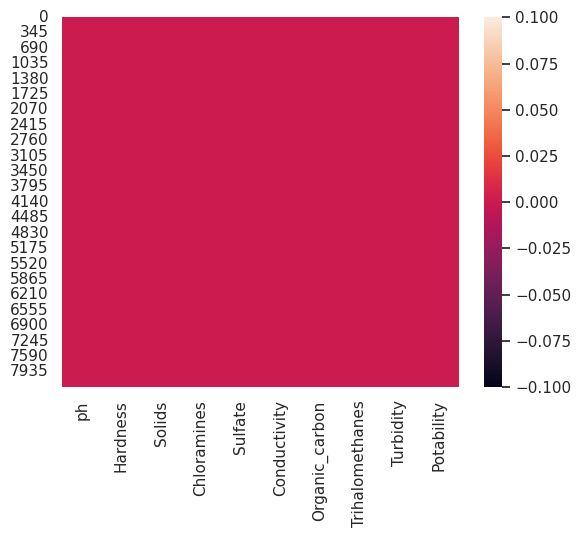

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
X.shape, y.shape

((8276, 9), (8276,))

In [ ]:
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Training and Testing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape , X_test.shape

((5793, 9), (2483, 9))

In [ ]:
y_train.shape , y_test.shape

((5793,), (2483,))

In [ ]:
# Find the largest label in the training data
num_classes = np.max(y_train) + 1
# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

In [ ]:
# FNN
# Create the FNN model
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
fnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
fnn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Get model predictions
pred_fnn = fnn_model.predict(X_test)

# Convert one-hot encoded predictions to label format
pred_fnn_labels = np.argmax(pred_fnn, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)


Epoch 1/10
73/73 [==============================] - 1s 3ms/step - loss: 0.6687 - accuracy: 0.6221 - val_loss: 0.6479 - val_accuracy: 0.6437
Epoch 2/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6515 - val_loss: 0.6425 - val_accuracy: 0.6480
Epoch 3/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6517 - val_loss: 0.6410 - val_accuracy: 0.6549
Epoch 4/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.6610 - val_loss: 0.6397 - val_accuracy: 0.6540
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.6649 - val_loss: 0.6388 - val_accuracy: 0.6583
Epoch 6/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6657 - val_loss: 0.6357 - val_accuracy: 0.6592
Epoch 7/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6683 - val_loss: 0.6381 - val_accuracy: 0.6592
Epoch 8/10
73/73 [==

In [ ]:

# Calculate FNN_Accuracy
FNN_Accuracy = accuracy_score(y_test_labels, pred_fnn_labels)
print('FNN_Accuracy',FNN_Accuracy)

# Calculate precision
FNN_Precision = precision_score(y_test_labels, pred_fnn_labels, average='weighted')
print('FNN_Precision:', FNN_Precision)

# Calculate Recall
FNN_Recall = recall_score(y_test_labels, pred_fnn_labels, average='weighted')
print('FNN_Recall:', FNN_Recall)

# Calculate F1 score
FNN_F1 = f1_score(y_test_labels, pred_fnn_labels, average='weighted')
print('FNN_F1_score:', FNN_F1)


FNN_Accuracy 0.653242045912203
FNN_Precision: 0.6205840471266599
FNN_Recall: 0.653242045912203
FNN_F1_score: 0.5684040711686044


In [ ]:
print(classification_report(y_test_labels, pred_fnn_labels))

              precision    recall  f1-score   support

           0       0.55      0.11      0.18       877
           1       0.66      0.95      0.78      1606

    accuracy                           0.65      2483
   macro avg       0.60      0.53      0.48      2483
weighted avg       0.62      0.65      0.57      2483



[[  95  782]
 [  79 1527]] 2483


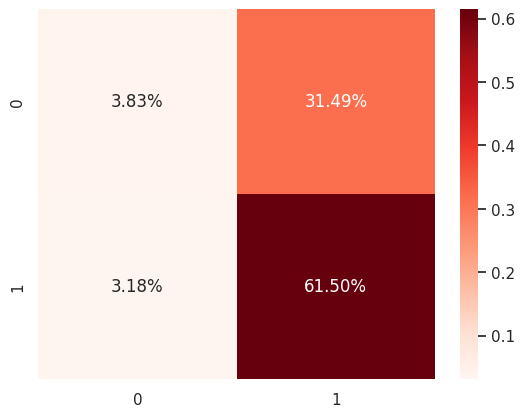

In [ ]:
# confusion Maxtrix
cm_fnn = confusion_matrix(y_test_labels, pred_fnn_labels )
sns.heatmap(cm_fnn/np.sum(cm_fnn), annot = True, fmt=  '0.2%', cmap = 'Reds')
print(cm_fnn,np.sum(cm_fnn))

In [ ]:
#CNN

cnn_model = tf.keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data for CNN input (add an additional dimension for the channel)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)
# Get model predictions
pred_CNN = cnn_model.predict(X_test_cnn)
# Convert one-hot encoded predictions to label format
pred_cnn_labels = np.argmax(pred_CNN, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

Epoch 1/10
73/73 [==============================] - 1s 3ms/step - loss: 0.6559 - accuracy: 0.6478 - val_loss: 0.6490 - val_accuracy: 0.6454
Epoch 2/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6532 - val_loss: 0.6444 - val_accuracy: 0.6540
Epoch 3/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6556 - val_loss: 0.6435 - val_accuracy: 0.6437
Epoch 4/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6554 - val_loss: 0.6530 - val_accuracy: 0.6480
Epoch 5/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6552 - val_loss: 0.6396 - val_accuracy: 0.6497
Epoch 6/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6616 - val_loss: 0.6404 - val_accuracy: 0.6428
Epoch 7/10
73/73 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6627 - val_loss: 0.6427 - val_accuracy: 0.6531
Epoch 8/10
73/73 [==

In [ ]:

# CNN_Accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)[1]
CNN_Accuracy = accuracy_score(y_test_labels, pred_cnn_labels)
print('CNN_Accuracy',CNN_Accuracy)
# Calculate precision
CNN_Precision = precision_score(y_test_labels, pred_cnn_labels, average='weighted')
print('CNN_Precision:', CNN_Precision)

# Calculate Recall
CNN_Recall = recall_score(y_test_labels, pred_cnn_labels, average='weighted')
print('CNN_Recall:', CNN_Recall)

# Calculate F1 score
CNN_F1 = f1_score(y_test_labels, pred_cnn_labels, average='weighted')
print('CNN_F1_score:', CNN_F1)

CNN_Accuracy 0.6467982279500604
CNN_Precision: 0.6035388467667092
CNN_Recall: 0.6467982279500604
CNN_F1_score: 0.5678981227102747


In [ ]:
print(classification_report(y_test_labels, pred_cnn_labels))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19       877
           1       0.66      0.94      0.77      1606

    accuracy                           0.65      2483
   macro avg       0.58      0.53      0.48      2483
weighted avg       0.60      0.65      0.57      2483



<Axes: >

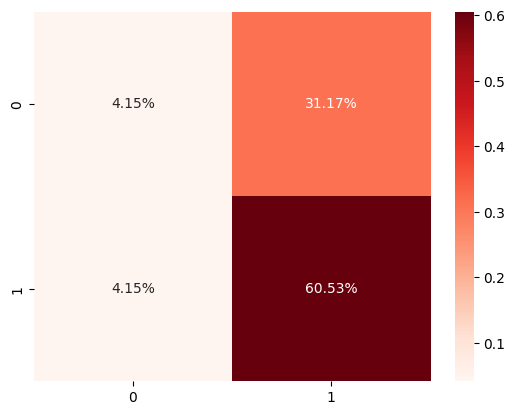

In [ ]:
cm_cnn = confusion_matrix(y_test_labels, pred_cnn_labels )
sns.heatmap(cm_cnn/np.sum(cm_cnn), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# SVM
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)

# Making Prediction
pred_svm = model_svm.predict(X_test)

# Calculating Accuracy Score
SVM_Accuracy = accuracy_score(y_test, pred_svm)
print('Accuracy:',SVM_Accuracy)

# Calculate Precision
SVM_Precision = precision_score(y_test, pred_svm, average='weighted')
print('Precision:', SVM_Precision)

# Calculate Recall
SVM_Recall = recall_score(y_test, pred_svm, average='weighted')
print('Recall:', SVM_Recall)

# Calculate F1-score
SVM_F1 = f1_score(y_test, pred_svm, average='weighted')
print('F1-score:', SVM_F1)

Accuracy: 0.6600886024969794
Precision: 0.669837179389418
Recall: 0.6600886024969794
F1-score: 0.5543590305304732


In [ ]:
print(classification_report(y_test,pred_svm))


              precision    recall  f1-score   support

           0       0.69      0.07      0.12       877
           1       0.66      0.98      0.79      1606

    accuracy                           0.66      2483
   macro avg       0.67      0.53      0.46      2483
weighted avg       0.67      0.66      0.55      2483



<Axes: >

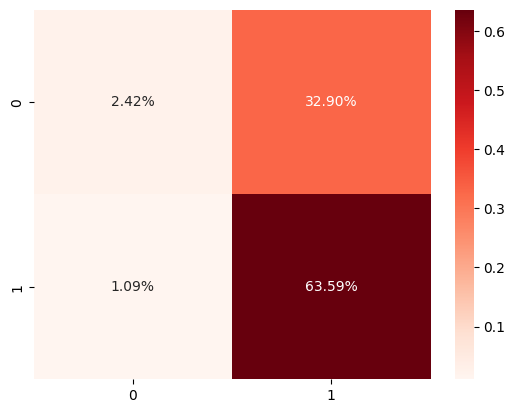

In [ ]:
# confusion Maxtrix
cm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm/np.sum(cm_svm), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# Random Forest
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculating Accuracy Score
RandomForest_Accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy:',RandomForest_Accuracy)

# Calculate Precision
RandomForest_Precision = precision_score(y_test, pred_rf, average='weighted')
print('Precision:', RandomForest_Precision)

# Calculate Recall
RandomForest_Recall = recall_score(y_test, pred_rf, average='weighted')
print('Recall:', RandomForest_Recall)

# Calculate F1-score
RandomForest_F1 = f1_score(y_test, pred_rf, average='weighted')
print('F1-score:', RandomForest_F1)

Accuracy: 0.6467982279500604
Precision: 0.41834794767933825
Recall: 0.6467982279500604
F1-score: 0.5080743233493749


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       877
           1       0.65      1.00      0.79      1606

    accuracy                           0.65      2483
   macro avg       0.32      0.50      0.39      2483
weighted avg       0.42      0.65      0.51      2483



<Axes: >

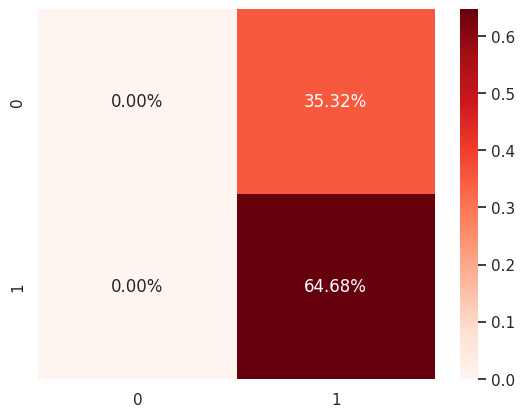

In [ ]:
# confusion Maxtrix
cm_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rf/np.sum(cm_rf), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 42,  learning_rate= 0.03, n_jobs=5)
# Training Model
model_xgb.fit(X_train, y_train)

# Making Prediction
pred_xgb = model_xgb.predict(X_test)
# Calculating Accuracy Score

xgb_Accuracy = accuracy_score(y_test, pred_xgb)
print('Accuracy:',xgb_Accuracy)

# Calculate Precision
xgb_Precision = precision_score(y_test, pred_xgb, average='weighted')
print('Precision:', xgb_Precision)

# Calculate Recall
xgb_Recall = recall_score(y_test, pred_xgb, average='weighted')
print('Recall:', xgb_Recall)

# Calculate F1-score
xgb_F1 = f1_score(y_test, pred_xgb, average='weighted')
print('F1-score:', xgb_F1)

Accuracy: 0.6492146596858639
Precision: 0.6093770775682171
Recall: 0.6492146596858639
F1-score: 0.5690386995461966


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.52      0.12      0.19       877
           1       0.66      0.94      0.78      1606

    accuracy                           0.65      2483
   macro avg       0.59      0.53      0.48      2483
weighted avg       0.61      0.65      0.57      2483



<Axes: >

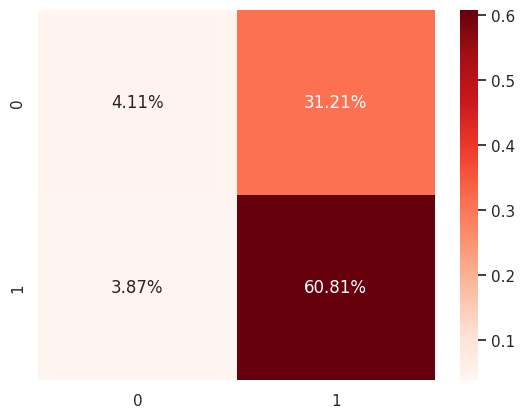

In [ ]:
# confusion Maxtrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
# To find which model is best
models = pd.DataFrame({
    'Model':['Random Forest', 'FNN', 'CNN','SVM','XGBoost'],
    'Accuracy' :[RandomForest_Accuracy, FNN_Accuracy,CNN_Accuracy,SVM_Accuracy,xgb_Accuracy],
    'Precision' : [RandomForest_Precision, FNN_Precision,CNN_Precision,SVM_Precision,xgb_Precision ],
    'F1_Score': [RandomForest_F1,FNN_F1,CNN_F1,SVM_F1,xgb_F1 ],
    'Recall' : [RandomForest_Recall,FNN_Recall,CNN_Recall,SVM_Recall,xgb_Recall ]
})
models


# Sort models based on Precision
models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision,F1_Score,Recall
3,SVM,0.660089,0.669837,0.554359,0.660089
2,CNN,0.654450,0.644118,0.544017,0.654450
1,FNN,0.653242,0.620584,0.568404,0.653242
4,XGBoost,0.649215,0.609377,0.569039,0.649215
0,Random Forest,0.646798,0.418348,0.508074,0.646798


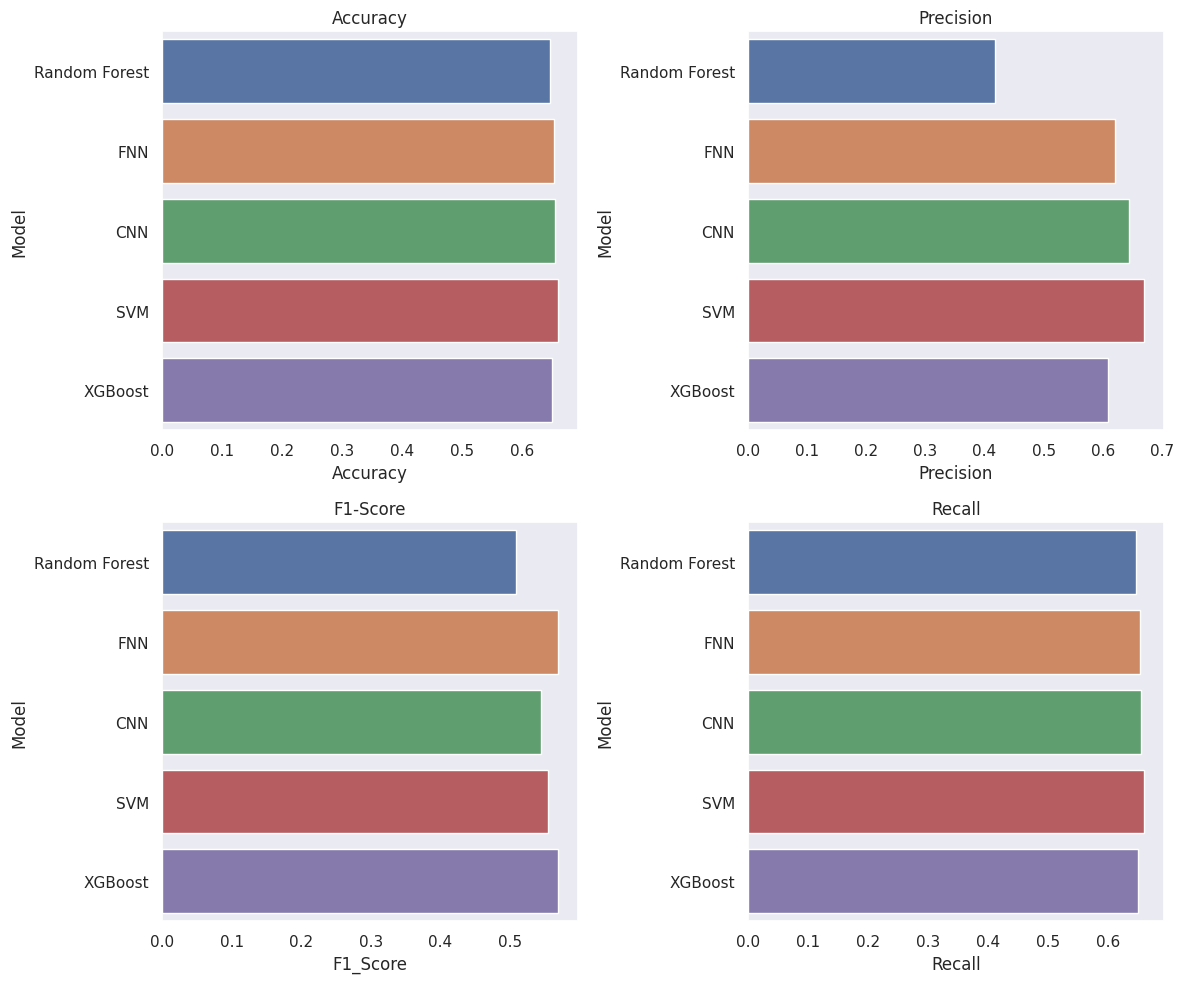

In [ ]:
# Create bar plots
sns.set(style='dark')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
sns.barplot(x='Accuracy', y='Model', data=models, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

# Precision
sns.barplot(x='Precision', y='Model', data=models, ax=axes[0, 1])
axes[0, 1].set_title('Precision')

# F1-Score
sns.barplot(x='F1_Score', y='Model', data=models, ax=axes[1, 0])
axes[1, 0].set_title('F1-Score')

# Recall
sns.barplot(x='Recall', y='Model', data=models, ax=axes[1, 1])
axes[1, 1].set_title('Recall')

plt.tight_layout()
plt.show()


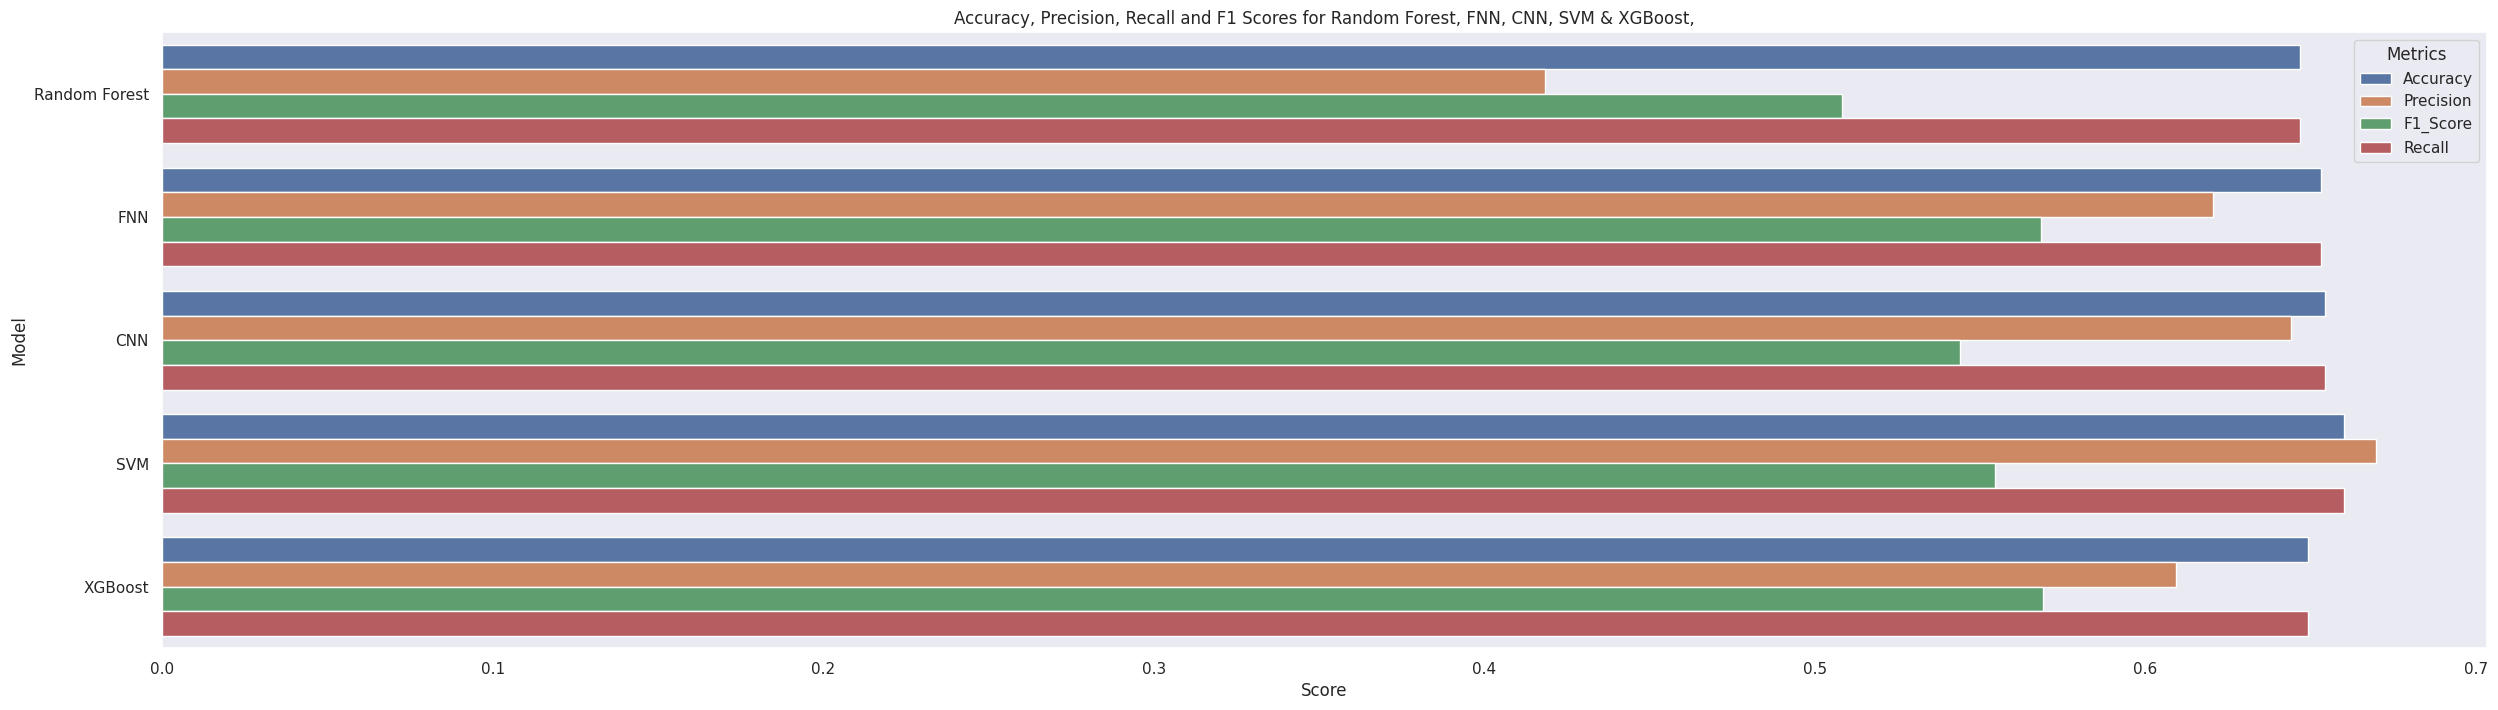

In [ ]:
# Melt the DataFrame to transform it into long format
melted_scores = pd.melt(models, id_vars=['Model'], value_vars=['Accuracy', 'Precision','F1_Score', 'Recall'])

# Create a combined bar plot
plt.figure(figsize=(30, 8))
sns.barplot(x='value', y='Model', hue='variable', data=melted_scores)
plt.title('Accuracy, Precision, Recall and F1 Scores for Random Forest, FNN, CNN, SVM & XGBoost,')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metrics')
plt.show()